In [15]:
def pre_processing(df):
    # 날짜컬럼 시계열화
    df['날짜'] = pd.to_datetime(df['날짜'])

    # 날짜를 인덱스로 한다.
    df.set_index('날짜', inplace=True)

    # 날짜 인덱스를 일별로 리샘플링합니다.
    df = df.asfreq('D')

    # 결측치를 선형 보간합니다. (method ->  'linear', 'polynomial', 'spline' 도 가능)
    # df.interpolate(method='linear', inplace=True)
    df.interpolate(method='polynomial', order=3, inplace=True)
    df = df.reset_index()

    # 2023년 8월 31일 이전의 데이터만 선택
    # 2006년 8월 4일 이후의 데이터만 선택
    # df = df[df['날짜'] <= '2023-08-31']
    df = df[df['날짜'] >= '2006-08-04']
    df = df.reset_index(drop=True)


    return df

In [16]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from darts import TimeSeries
from darts.models import DLinearModel, XGBModel
from darts.metrics import rmse

from datetime import datetime, timedelta


In [17]:
df = pd.read_csv("./Busheling_price.csv")
df = df[['날짜', '생철A (Busheling A) 평균']]

# 중복값 제거
df.drop_duplicates(subset='날짜',inplace=True)

# 선형 보간
df = pre_processing(df)

# 컬렴명 변경
df.rename(columns={'날짜':'date', '생철A (Busheling A) 평균':'avg'}, inplace=True)

# df 생성
days_700 = df.iloc[-700:].reset_index(drop=True)
days_700['pred'] = 0

# TimeSeries 객체로 변환
series = TimeSeries.from_dataframe(df, "date", "avg")

pred_list = []

for n in tqdm(list(range(693,-1,-7))):

    # 2850일로 7일 예측하기
    train = series[-2857-n:-7-n]

    # DLinear 모델
    model = DLinearModel(input_chunk_length=128, output_chunk_length=28, batch_size=256, n_epochs=100)
    model.fit(train)

    pred = model.predict(7)
    pred = list(pred.values().flatten())

    pred_list += pred


  0%|          | 0/100 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.57it/s, train_loss=241.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.03it/s, train_loss=241.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.62it/s]

  1%|          | 1/100 [00:55<1:31:58, 55.74s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 20.02it/s, train_loss=216.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.94it/s, train_loss=216.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.63it/s]

  2%|▏         | 2/100 [01:50<1:29:51, 55.01s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.21it/s, train_loss=222.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.21it/s, train_loss=222.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.79it/s]

  3%|▎         | 3/100 [02:49<1:32:06, 56.98s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.27it/s, train_loss=252.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.20it/s, train_loss=252.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 75.05it/s]

  4%|▍         | 4/100 [03:50<1:33:54, 58.69s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.33it/s, train_loss=197.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.27it/s, train_loss=197.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 179.49it/s]

  5%|▌         | 5/100 [04:51<1:34:10, 59.48s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.84it/s, train_loss=229.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.78it/s, train_loss=229.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 159.08it/s]

  6%|▌         | 6/100 [06:06<1:41:17, 64.66s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.00it/s, train_loss=218.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.90it/s, train_loss=218.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 18.01it/s]

  7%|▋         | 7/100 [07:07<1:38:27, 63.52s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 11.44it/s, train_loss=169.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 11.43it/s, train_loss=169.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.70it/s]

  8%|▊         | 8/100 [08:14<1:39:10, 64.68s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.27it/s, train_loss=204.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.22it/s, train_loss=204.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 186.91it/s]

  9%|▉         | 9/100 [09:35<1:45:45, 69.74s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.40it/s, train_loss=194.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.33it/s, train_loss=194.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 91.99it/s]

 10%|█         | 10/100 [10:38<1:41:26, 67.62s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.31it/s, train_loss=240.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.28it/s, train_loss=240.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 131.80it/s]

 11%|█         | 11/100 [11:53<1:43:49, 69.99s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.11it/s, train_loss=197.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.05it/s, train_loss=197.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 125.02it/s]

 12%|█▏        | 12/100 [13:00<1:41:04, 68.91s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.87it/s, train_loss=245.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.82it/s, train_loss=245.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 111.11it/s]

 13%|█▎        | 13/100 [14:06<1:38:34, 67.99s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.06it/s, train_loss=247.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.01it/s, train_loss=247.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 125.94it/s]

 14%|█▍        | 14/100 [15:28<1:43:29, 72.20s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.74it/s, train_loss=290.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.74it/s, train_loss=290.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 127.41it/s]

 15%|█▌        | 15/100 [16:32<1:38:51, 69.78s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.88it/s, train_loss=232.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.83it/s, train_loss=232.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 130.48it/s]

 16%|█▌        | 16/100 [17:48<1:40:16, 71.62s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.39it/s, train_loss=211.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.33it/s, train_loss=211.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 69.25it/s]

 17%|█▋        | 17/100 [18:53<1:36:31, 69.78s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.45it/s, train_loss=216.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.19it/s, train_loss=216.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 311.33it/s]

 18%|█▊        | 18/100 [20:01<1:34:42, 69.30s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.92it/s, train_loss=321.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.86it/s, train_loss=321.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.69it/s]

 19%|█▉        | 19/100 [21:16<1:35:50, 71.00s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.07it/s, train_loss=232.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.01it/s, train_loss=232.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.71it/s]

 20%|██        | 20/100 [22:17<1:30:35, 67.95s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.19it/s, train_loss=221.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.19it/s, train_loss=221.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 127.51it/s]

 21%|██        | 21/100 [23:32<1:32:03, 69.92s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.35it/s, train_loss=212.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.29it/s, train_loss=212.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.47it/s]

 22%|██▏       | 22/100 [24:38<1:29:24, 68.78s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.63it/s, train_loss=267.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.56it/s, train_loss=267.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 20.94it/s]

 23%|██▎       | 23/100 [25:43<1:26:49, 67.66s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.57it/s, train_loss=242.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.29it/s, train_loss=242.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.71it/s]

 24%|██▍       | 24/100 [27:00<1:29:08, 70.37s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.87it/s, train_loss=264.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.80it/s, train_loss=264.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 124.98it/s]

 25%|██▌       | 25/100 [27:59<1:24:02, 67.23s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.08it/s, train_loss=217.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.02it/s, train_loss=217.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.46it/s]

 26%|██▌       | 26/100 [29:09<1:23:43, 67.89s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.37it/s, train_loss=248.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.37it/s, train_loss=248.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 135.22it/s]

 27%|██▋       | 27/100 [30:22<1:24:25, 69.39s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.41it/s, train_loss=279.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.34it/s, train_loss=279.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 108.99it/s]

 28%|██▊       | 28/100 [31:23<1:20:26, 67.04s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.64it/s, train_loss=246.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.64it/s, train_loss=246.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 123.22it/s]

 29%|██▉       | 29/100 [32:40<1:22:35, 69.79s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.72it/s, train_loss=318.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.67it/s, train_loss=318.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]


 30%|███       | 30/100 [33:42<1:18:53, 67.62s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.14it/s, train_loss=237.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.08it/s, train_loss=237.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 132.97it/s]

 31%|███       | 31/100 [34:49<1:17:21, 67.26s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.72it/s, train_loss=339.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.66it/s, train_loss=339.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.69it/s]

 32%|███▏      | 32/100 [36:04<1:18:52, 69.60s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.18it/s, train_loss=250.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.10it/s, train_loss=250.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 67.51it/s]

 33%|███▎      | 33/100 [37:06<1:15:21, 67.49s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.94it/s, train_loss=253.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.87it/s, train_loss=253.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 131.34it/s]

 34%|███▍      | 34/100 [38:24<1:17:32, 70.49s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.80it/s, train_loss=314.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.51it/s, train_loss=314.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.59it/s]

 35%|███▌      | 35/100 [39:26<1:13:49, 68.15s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.70it/s, train_loss=299.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.65it/s, train_loss=299.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 227.04it/s]

 36%|███▌      | 36/100 [40:34<1:12:30, 67.98s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.98it/s, train_loss=256.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.98it/s, train_loss=256.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.03it/s]

 37%|███▋      | 37/100 [41:50<1:13:47, 70.28s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.41it/s, train_loss=293.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.35it/s, train_loss=293.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 125.01it/s]

 38%|███▊      | 38/100 [42:52<1:10:03, 67.79s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.85it/s, train_loss=245.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.23it/s, train_loss=245.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 121.10it/s]

 39%|███▉      | 39/100 [44:09<1:11:51, 70.68s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.82it/s, train_loss=382.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.51it/s, train_loss=382.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.95it/s]

 40%|████      | 40/100 [45:13<1:08:47, 68.79s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.29it/s, train_loss=327.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.24it/s, train_loss=327.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.83it/s]

 41%|████      | 41/100 [46:20<1:07:03, 68.19s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.21it/s, train_loss=345.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.21it/s, train_loss=345.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 71.43it/s]

 42%|████▏     | 42/100 [47:38<1:08:35, 70.96s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.35it/s, train_loss=399.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.30it/s, train_loss=399.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 136.83it/s]

 43%|████▎     | 43/100 [48:40<1:04:55, 68.34s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.19it/s, train_loss=401.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.19it/s, train_loss=401.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 126.99it/s]

 44%|████▍     | 44/100 [49:56<1:06:06, 70.83s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.15it/s, train_loss=459.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.09it/s, train_loss=459.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.71it/s]

 45%|████▌     | 45/100 [51:01<1:03:11, 68.94s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.49it/s, train_loss=354.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.49it/s, train_loss=354.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 132.27it/s]

 46%|████▌     | 46/100 [52:10<1:02:04, 68.97s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.26it/s, train_loss=266.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.26it/s, train_loss=266.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 143.25it/s]

 47%|████▋     | 47/100 [53:24<1:02:21, 70.59s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.67it/s, train_loss=341.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.67it/s, train_loss=341.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 126.88it/s]

 48%|████▊     | 48/100 [54:28<59:27, 68.60s/it]  

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.42it/s, train_loss=297.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.34it/s, train_loss=297.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 99.98it/s] 

 49%|████▉     | 49/100 [55:47<1:00:48, 71.53s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.52it/s, train_loss=402.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.52it/s, train_loss=402.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 129.65it/s]

 50%|█████     | 50/100 [56:49<57:22, 68.86s/it]  GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.44it/s, train_loss=338.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.40it/s, train_loss=338.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 122.48it/s]

 51%|█████     | 51/100 [58:02<57:13, 70.07s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.85it/s, train_loss=396.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.79it/s, train_loss=396.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.50it/s]

 52%|█████▏    | 52/100 [59:13<56:11, 70.23s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.91it/s, train_loss=352.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.86it/s, train_loss=352.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 126.51it/s]

 53%|█████▎    | 53/100 [1:00:19<54:00, 68.94s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.05it/s, train_loss=359.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.01it/s, train_loss=359.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 131.53it/s]

 54%|█████▍    | 54/100 [1:01:37<55:05, 71.87s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.06it/s, train_loss=275.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.00it/s, train_loss=275.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 137.49it/s]

 55%|█████▌    | 55/100 [1:02:40<51:47, 69.05s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.90it/s, train_loss=363.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.84it/s, train_loss=363.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 119.78it/s]

 56%|█████▌    | 56/100 [1:03:56<52:09, 71.13s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.19it/s, train_loss=385.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.11it/s, train_loss=385.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.86it/s]

 57%|█████▋    | 57/100 [1:05:04<50:17, 70.16s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.66it/s, train_loss=418.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.59it/s, train_loss=418.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.76it/s]

 58%|█████▊    | 58/100 [1:06:12<48:37, 69.46s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.35it/s, train_loss=382.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.35it/s, train_loss=382.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.07it/s]


 59%|█████▉    | 59/100 [1:07:29<49:10, 71.97s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.45it/s, train_loss=357.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.38it/s, train_loss=357.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 105.84it/s]

 60%|██████    | 60/100 [1:08:33<46:15, 69.39s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.08it/s, train_loss=445.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.04it/s, train_loss=445.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 151.08it/s]

 61%|██████    | 61/100 [1:09:51<46:53, 72.15s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.01it/s, train_loss=401.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.96it/s, train_loss=401.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 121.36it/s]

 62%|██████▏   | 62/100 [1:10:56<44:16, 69.92s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.56it/s, train_loss=575.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.53it/s, train_loss=575.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 105.14it/s]

 63%|██████▎   | 63/100 [1:12:07<43:17, 70.20s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.03it/s, train_loss=551.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.00it/s, train_loss=551.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 142.87it/s]

 64%|██████▍   | 64/100 [1:13:22<42:59, 71.65s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.35it/s, train_loss=428.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.35it/s, train_loss=428.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 512.06it/s]

 65%|██████▌   | 65/100 [1:14:25<40:17, 69.06s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.65it/s, train_loss=431.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.60it/s, train_loss=431.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.01it/s]

 66%|██████▌   | 66/100 [1:15:39<39:55, 70.45s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.95it/s, train_loss=402.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.95it/s, train_loss=402.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.67it/s] 

 67%|██████▋   | 67/100 [1:16:38<36:53, 67.06s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.31it/s, train_loss=408.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.04it/s, train_loss=408.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 242.18it/s]

 68%|██████▊   | 68/100 [1:17:47<36:01, 67.53s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.49it/s, train_loss=430.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.49it/s, train_loss=430.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 69%|██████▉   | 69/100 [1:18:57<35:22, 68.47s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.32it/s, train_loss=486.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.32it/s, train_loss=486.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.64it/s]

 70%|███████   | 70/100 [1:19:58<33:09, 66.31s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.81it/s, train_loss=359.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.50it/s, train_loss=359.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 278.93it/s]

 71%|███████   | 71/100 [1:21:13<33:17, 68.87s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.40it/s, train_loss=371.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.40it/s, train_loss=371.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 86.22it/s]

 72%|███████▏  | 72/100 [1:22:14<30:59, 66.41s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.35it/s, train_loss=361.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.02it/s, train_loss=361.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]


 73%|███████▎  | 73/100 [1:23:21<30:01, 66.72s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 20.05it/s, train_loss=445.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 20.05it/s, train_loss=445.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 74%|███████▍  | 74/100 [1:24:33<29:33, 68.22s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.26it/s, train_loss=513.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.26it/s, train_loss=513.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 53.00it/s]

 75%|███████▌  | 75/100 [1:25:34<27:32, 66.08s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.00it/s, train_loss=421.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.70it/s, train_loss=421.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 163.95it/s]

 76%|███████▌  | 76/100 [1:26:49<27:27, 68.63s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.31it/s, train_loss=323.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.31it/s, train_loss=323.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 84.75it/s]

 77%|███████▋  | 77/100 [1:27:49<25:22, 66.19s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.67it/s, train_loss=546.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.37it/s, train_loss=546.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 78%|███████▊  | 78/100 [1:28:56<24:20, 66.40s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 20.64it/s, train_loss=399.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 20.04it/s, train_loss=399.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.40it/s]

 79%|███████▉  | 79/100 [1:30:08<23:51, 68.15s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.57it/s, train_loss=431.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.57it/s, train_loss=431.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 64.00it/s]

 80%|████████  | 80/100 [1:31:09<21:57, 65.88s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.34it/s, train_loss=369.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.34it/s, train_loss=369.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 70.26it/s]

 81%|████████  | 81/100 [1:32:24<21:41, 68.48s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.40it/s, train_loss=411.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 19.34it/s, train_loss=411.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 259.77it/s]

 82%|████████▏ | 82/100 [1:33:25<19:55, 66.41s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.78it/s, train_loss=364.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.75it/s, train_loss=364.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 83%|████████▎ | 83/100 [1:34:31<18:44, 66.16s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.91it/s, train_loss=426.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.91it/s, train_loss=426.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 31.81it/s]

 84%|████████▍ | 84/100 [1:35:44<18:12, 68.29s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.90it/s, train_loss=307.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.90it/s, train_loss=307.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.00it/s]

 85%|████████▌ | 85/100 [1:36:44<16:28, 65.91s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.69it/s, train_loss=306.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.69it/s, train_loss=306.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 86%|████████▌ | 86/100 [1:37:58<15:54, 68.20s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.85it/s, train_loss=409.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.85it/s, train_loss=409.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 156.31it/s]

 87%|████████▋ | 87/100 [1:39:01<14:27, 66.71s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.91it/s, train_loss=496.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.91it/s, train_loss=496.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 146.58it/s]

 88%|████████▊ | 88/100 [1:40:06<13:12, 66.05s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.38it/s, train_loss=377.0] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.38it/s, train_loss=377.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 89%|████████▉ | 89/100 [1:41:19<12:30, 68.26s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.33it/s, train_loss=416.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.33it/s, train_loss=416.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 305.24it/s]

 90%|█████████ | 90/100 [1:42:20<11:01, 66.10s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.36it/s, train_loss=383.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 14.36it/s, train_loss=383.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 569.34it/s]

 91%|█████████ | 91/100 [1:43:33<10:13, 68.19s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.60it/s, train_loss=381.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.60it/s, train_loss=381.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 156.16it/s]

 92%|█████████▏| 92/100 [1:44:37<08:55, 66.92s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.50it/s, train_loss=439.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 16.50it/s, train_loss=439.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.14it/s]

 93%|█████████▎| 93/100 [1:45:41<07:42, 66.01s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.83it/s, train_loss=374.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.77it/s, train_loss=374.0]

GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 368.96it/s]

 94%|█████████▍| 94/100 [1:46:55<06:50, 68.42s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.18it/s, train_loss=485.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.18it/s, train_loss=485.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 95%|█████████▌| 95/100 [1:47:55<05:29, 65.82s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 13.18it/s, train_loss=415.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 12.95it/s, train_loss=415.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<?, ?it/s]

 96%|█████████▌| 96/100 [1:49:07<04:31, 67.77s/it]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.80it/s, train_loss=423.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.80it/s, train_loss=423.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 102.13it/s]

 97%|█████████▋| 97/100 [1:50:12<03:20, 66.91s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.27it/s, train_loss=500.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 15.27it/s, train_loss=500.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 74.08it/s]

 98%|█████████▊| 98/100 [1:51:15<02:11, 65.86s/it]GPU available: False, used: False


TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 18.07it/s, train_loss=369.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.63it/s, train_loss=369.0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 597.31it/s]

 99%|█████████▉| 99/100 [1:52:29<01:08, 68.21s/it]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_metrics   | MetricCollection | 0     
2 | val_metrics     | MetricCollection | 0     
3 | decomposition   | _SeriesDecomp    | 0     
4 | linear_seasonal | Linear           | 3.6 K 
5 | linear_trend    | Linear           | 3.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.81it/s, train_loss=366.0]  

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 11/11 [00:00<00:00, 17.37it/s, train_loss=366.0]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 124.94it/s]

100%|██████████| 100/100 [1:53:29<00:00, 68.10s/it]

In [18]:
pred_list

[618.7916158756419,
 617.6585110168485,
 615.9628404578543,
 618.4863107611769,
 621.4778291125085,
 621.1264586330504,
 621.3000426281726,
 614.6461655009658,
 612.3218852842408,
 614.7506369371588,
 612.4920450303489,
 613.806706780091,
 608.161504680343,
 610.6355049093454,
 610.3629012810204,
 608.6300385170183,
 607.4090099114628,
 608.1897318232235,
 609.2851930658937,
 610.004032519548,
 611.5557221963182,
 613.3461341445263,
 615.8289799673331,
 618.1104224866399,
 622.1785288928493,
 624.5789266780187,
 626.9749377369814,
 625.3939732579252,
 610.5562476745461,
 611.5695882134663,
 613.5992530949752,
 614.7695713018267,
 611.1033345697166,
 611.1586761769312,
 608.6356221092329,
 637.8123934896357,
 639.7498927872663,
 641.2988581317422,
 641.910765400549,
 642.6009868893188,
 644.2474445528657,
 646.0156198261541,
 642.6233768935202,
 641.5442301450432,
 640.1469285490035,
 639.2336524252265,
 641.7499497461872,
 642.5404995997217,
 640.0472620400693,
 654.6387524144791,
 654

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = []

for a in range(0,700,7):
    rmse = mean_squared_error(days_700['avg'][a:a+7], days_700['pred'][a:a+7]) ** 0.5
    for _ in range(7):
        RMSE.append(rmse)

In [53]:
days_700['pred'] = pred_list
days_700['diff'] = abs(days_700['avg'] - days_700['pred'])
days_700['RMSE'] = RMSE
days_700['total_RMSE'] = mean_squared_error(days_700['avg'], days_700['pred']) ** 0.5
days_700

,date,avg,pred,diff,RMSE,total_RMSE
0,2021-12-08,620.335900,618.791616,1.544284,3.339297,8.25089
1,2021-12-09,619.659584,617.658511,2.001073,3.339297,8.25089
2,2021-12-10,618.968345,615.962840,3.005505,3.339297,8.25089
3,2021-12-11,618.259475,618.486311,0.226836,3.339297,8.25089
4,2021-12-12,617.530266,621.477829,3.947563,3.339297,8.25089
...,...,...,...,...,...,...
695,2023-11-03,458.143812,458.372422,0.228611,0.614709,8.25089
696,2023-11-04,456.945948,456.802174,0.143774,0.614709,8.25089
697,2023-11-05,455.837689,455.001367,0.836322,0.614709,8.25089
698,2023-11-06,454.846539,454.018552,0.827987,0.614709,8.25089


In [55]:
days_700.describe().iloc[:,1:]

,avg,pred,diff,RMSE,total_RMSE
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02
mean,548.299728,549.404576,5.230641,5.993369,8.250890e+00
min,427.813436,415.231620,0.002328,0.503109,8.250890e+00
25%,469.692551,471.977896,1.140304,1.989922,8.250890e+00
50%,525.270848,525.912981,2.903467,3.632229,8.250890e+00
75%,617.663269,619.375327,6.740657,7.952145,8.250890e+00
max,725.224071,732.809200,44.500462,27.841992,8.250890e+00
std,86.044601,86.879873,6.385596,5.674743,1.777627e-15


In [56]:
days_700.to_csv('pred_busheling.csv', index=False)

(array([350., 400., 450., 500., 550., 600., 650., 700., 750.]),
 [Text(0, 350.0, '350'),
  Text(0, 400.0, '400'),
  Text(0, 450.0, '450'),
  Text(0, 500.0, '500'),
  Text(0, 550.0, '550'),
  Text(0, 600.0, '600'),
  Text(0, 650.0, '650'),
  Text(0, 700.0, '700'),
  Text(0, 750.0, '750')])

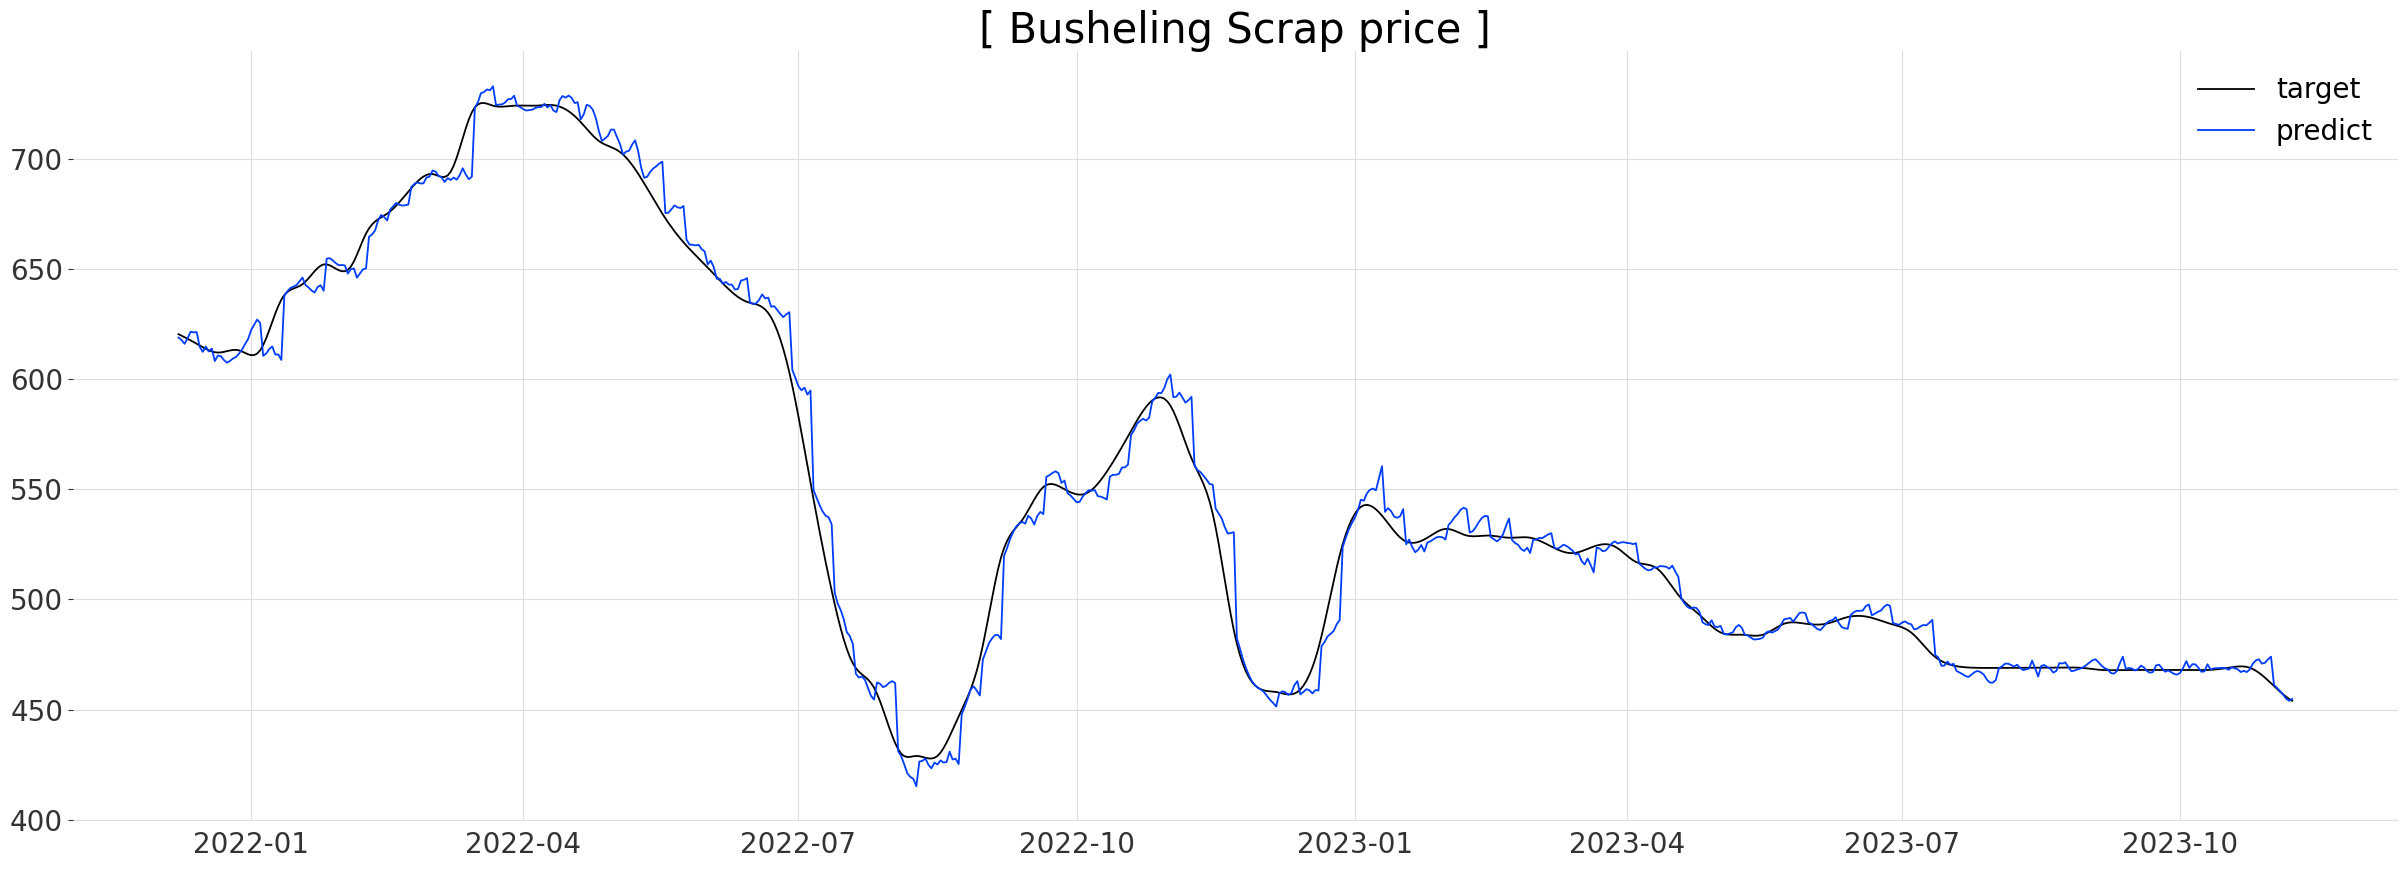

In [57]:
plt.figure(figsize=(30, 10))
plt.plot(days_700['date'], days_700['avg'], label='target')
plt.plot(days_700['date'], days_700['pred'], label='predict')
plt.legend(fontsize=20)
plt.title("[ Busheling Scrap price ]", fontsize=30)

plt.xticks()
plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20)

In [4]:
import pandas as pd
days_700 = pd.read_csv(r'C:\Users\KDP-26-\Desktop\MT\darts\pred_busheling.csv')
days_700

,date,avg,pred,diff,RMSE,total_RMSE
0,2021-12-08,620.335900,618.791616,1.544284,3.339297,8.25089
1,2021-12-09,619.659584,617.658511,2.001073,3.339297,8.25089
2,2021-12-10,618.968345,615.962840,3.005505,3.339297,8.25089
3,2021-12-11,618.259475,618.486311,0.226836,3.339297,8.25089
4,2021-12-12,617.530266,621.477829,3.947563,3.339297,8.25089
...,...,...,...,...,...,...
695,2023-11-03,458.143812,458.372422,0.228611,0.614709,8.25089
696,2023-11-04,456.945948,456.802174,0.143774,0.614709,8.25089
697,2023-11-05,455.837689,455.001367,0.836322,0.614709,8.25089
698,2023-11-06,454.846539,454.018552,0.827987,0.614709,8.25089
